In [1]:
from fastai2.vision.all import *

In [4]:
path = Path('./data')

In [5]:
path.ls()

(#2) [Path('data/trainLabels.csv'),Path('data/colored_images')]

In [8]:
image_folders = path / 'colored_images'
csv_file = path / 'trainLabels.csv'

In [11]:
df = pd.read_csv(csv_file)
df.head()

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


In [21]:
bs = 24

In [22]:
dls = ImageDataLoaders.from_folder(path, valid_pct=0.2, bs=bs)

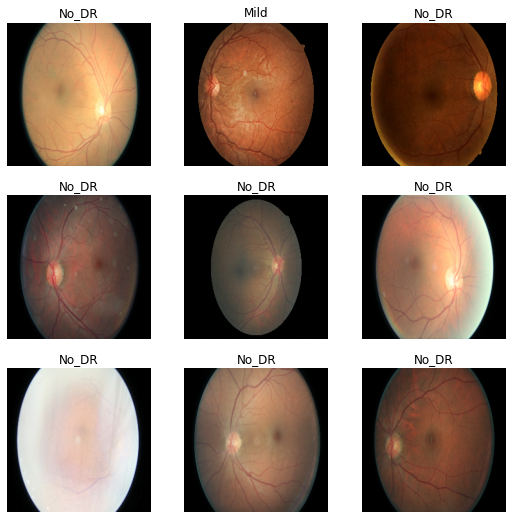

In [23]:
dls.show_batch(nrows=3, ncols=3)

In [29]:
kappa = CohenKappa()
kappa.weights = "quadratic"
learn = cnn_learner(dls, resnet50, metrics=[accuracy, kappa])
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,accuracy,cohen_kappa_score,time
0,0.870156,0.844695,0.722278,0.166204,04:56


epoch,train_loss,valid_loss,accuracy,cohen_kappa_score,time
0,0.765188,0.708916,0.763701,0.250003,06:38
1,0.661934,0.671691,0.781068,0.321935,06:37
2,0.554314,0.648444,0.784484,0.394386,06:37


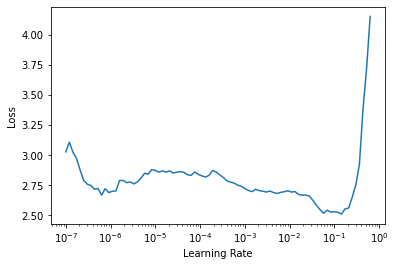

In [30]:
learn = cnn_learner(dls, resnet50, metrics=[accuracy, kappa])
lr_min,lr_steep = learn.lr_find()

In [31]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 1.45e-02, steepest point: 3.31e-02


In [32]:
learn.fit_one_cycle(3, 3e-3)

epoch,train_loss,valid_loss,accuracy,cohen_kappa_score,time
0,0.878920,0.805611,0.733808,0.210244,04:55
1,0.748019,0.703526,0.768256,0.257781,04:56
2,0.668765,0.655658,0.779217,0.328003,04:56


In [33]:
learn.unfreeze()

SuggestedLRs(lr_min=7.585775847473997e-08, lr_steep=2.511886486900039e-05)

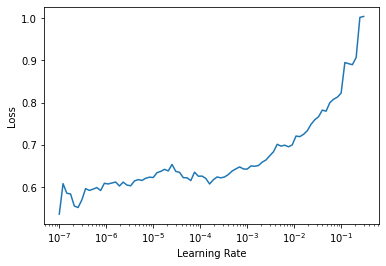

In [34]:
learn.lr_find()

In [35]:
learn.fit_one_cycle(6, lr_max=3e-5)

Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, b

KeyboardInterrupt: 